# Bank Churn Data Modeling Project

## Setup

In [4]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
file_path='../Data/prepped_bank_churn.csv'
data=pd.read_csv(file_path)

In [6]:
#Check that I did it correctly
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   EstimatedSalary     10000 non-null  float64
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Exited              10000 non-null  int64  
 7   Geography_Germany   10000 non-null  bool   
 8   Geography_Spain     10000 non-null  bool   
 9   Gender_Male         10000 non-null  bool   
 10  HasCrCard_Yes       10000 non-null  bool   
 11  IsActiveMember_Yes  10000 non-null  bool   
 12  Bal_v_Sal           10000 non-null  float64
dtypes: bool(5), float64(3), int64(5)
memory usage: 674.0 KB


<Axes: >

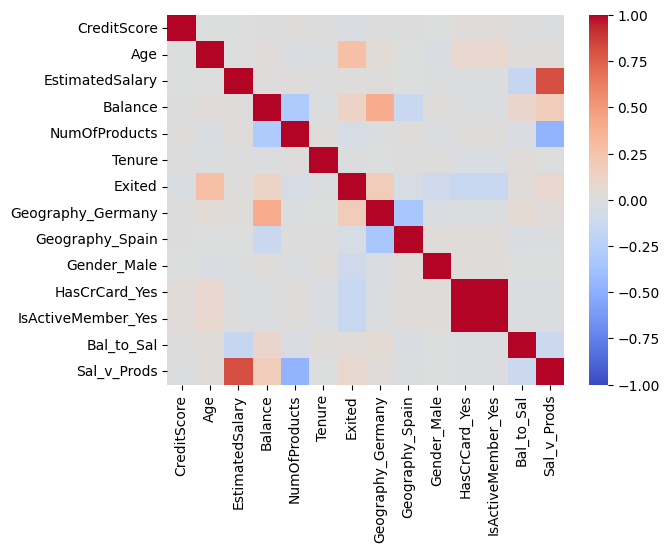

In [17]:
#Went back through the lesson and saw this pro tip
sns.heatmap(data.corr(numeric_only=True),vmin=-1,vmax=1,cmap="coolwarm")

So Age, Balance and being German are the most positively correlated to churn and having a credit card and being an active member have a negative correlation to churn. I will make note of this in the model fitting and tuning portion of the project.

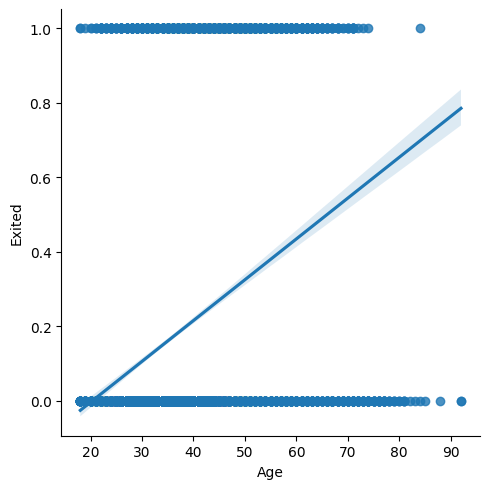

In [22]:
sns.lmplot(data,x="Age", y="Exited")

## More Feature Engineering

In [7]:
#Instructions for this project started from the beginning, but I am not getting lost in EDA. They add a new feature: income v products.
#I will also be renaming the Bal_v_Sal column to 'Bal_to_Sal' based on this project's instructions
data=data.rename(columns={'Bal_v_Sal':'Bal_to_Sal'})
data['Sal_v_Prods']=round(data.EstimatedSalary/data.NumOfProducts,2)
data.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Bal_to_Sal,Sal_v_Prods
0,619,42,101348.88,0.00,1,2,1,False,False,False,True,True,0.00,101348.88
1,608,41,112542.58,83807.86,1,1,0,False,True,False,True,True,0.74,112542.58
2,502,42,113931.57,159660.80,3,8,1,False,False,False,False,False,1.40,37977.19
3,699,39,93826.63,0.00,2,1,0,False,False,False,False,False,0.00,46913.32
4,850,43,79084.10,125510.82,1,2,0,False,True,False,True,True,1.59,79084.10


## Split the Data

In [8]:
#Define the features
X=data[['Age','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male','Bal_to_Sal','Sal_v_Prods']]

#Define the target
y=data['Exited']

#Split the training and test data sets
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [9]:
#Check out the data
#X_train.head()
y_train.head()

9919    0
7994    1
3564    1
6734    1
1588    0
Name: Exited, dtype: int64

## Logistic Regression Model

### Inference using Statsmodels

In [31]:
#import statsmodel
import statsmodels.api as sm

#set the variables
X=sm.add_constant(data[["Age","Balance"]])
y=data["Exited"]

model = sm.OLS(y,X).fit()

OLS_results=pd.DataFrame(model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])
OLS_results

,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,-0.2728,0.015,-17.763,0.000,-0.303,-0.243
1,Age,0.0108,0.000,29.629,0.000,0.010,0.012
2,Balance,7.138e-07,6.15e-08,11.609,0.000,5.93e-07,8.34e-07


The features are statistically significant but not indicative of churn using this model.

In [ ]:
#test out predictions using the OLS model
model.predict([1,35,50000])

array([0.14229034])

In [10]:
from sklearn.linear_model import LogisticRegression

churn=LogisticRegression().fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#churn.predict_proba(X_train)
#churn.score(X_train,y_train)


### Confusion Matrix

In [12]:
from sklearn import metrics